In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_dir="/kaggle/input/corona1/Dataset_2/train/"
test_dir="/kaggle/input/corona1/Dataset_2/test/"

train_norm_dir=train_dir+"Normal/"
test_norm_dir=test_dir+"Normal/"

train_covid19_dir=train_dir+"Covid_19/"
test_covid19_dir=test_dir+"Covid_19/"

train_pneumonia_dir=train_dir+"Pneumonia/"
test_pneumonia_dir=test_dir+"Pneumonia/"

In [3]:
print("total training normal images",len(os.listdir(train_norm_dir)))
print("total training covid19 images",len(os.listdir(train_covid19_dir)))
print("total training Pneumonia images",len(os.listdir(train_pneumonia_dir)))
print("total testing normal images",len(os.listdir(test_norm_dir)))
print("total testing covid19 images",len(os.listdir(test_covid19_dir)))
print("total testing Pneumonia images",len(os.listdir(test_pneumonia_dir)))

total training normal images 240
total training covid19 images 240
total training Pneumonia images 240
total testing normal images 102
total testing covid19 images 102
total testing Pneumonia images 102


In [4]:
from tensorflow.keras.models import Model
VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
for layer in VGG16_MODEL.layers:
    layer.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3,activation='softmax')
model = tf.keras.Sequential([VGG16_MODEL,global_average_layer,prediction_layer])
model.compile(optimizer=tf.optimizers.Adam(), 
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["accuracy"])



58892288/58889256 [==============================] - 1s 0us/step


In [5]:
train_datagen=ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator=train_datagen.flow_from_directory(
               train_dir,target_size=(224,224),class_mode="categorical")

validation_datagen=ImageDataGenerator(rescale=1/255)

validation_generator=validation_datagen.flow_from_directory(
               test_dir,target_size=(224,224),class_mode="categorical")

Found 720 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [6]:
history=model.fit_generator(train_generator,epochs=50,verbose=1,validation_data=validation_generator) 

Epoch 1/50
23/23 [==============================] - 33s 1s/step - loss: 1.1021 - accuracy: 0.3875 - val_loss: 1.0503 - val_accuracy: 0.4314
Epoch 2/50
23/23 [==============================] - 28s 1s/step - loss: 1.0166 - accuracy: 0.5583 - val_loss: 0.9785 - val_accuracy: 0.6373
Epoch 3/50
23/23 [==============================] - 28s 1s/step - loss: 0.9567 - accuracy: 0.6667 - val_loss: 0.9273 - val_accuracy: 0.6569
Epoch 4/50
23/23 [==============================] - 28s 1s/step - loss: 0.9052 - accuracy: 0.7250 - val_loss: 0.8804 - val_accuracy: 0.7222
Epoch 5/50
23/23 [==============================] - 29s 1s/step - loss: 0.8548 - accuracy: 0.7653 - val_loss: 0.8427 - val_accuracy: 0.7418
Epoch 6/50
23/23 [==============================] - 28s 1s/step - loss: 0.8173 - accuracy: 0.7597 - val_loss: 0.8092 - val_accuracy: 0.7549
Epoch 7/50
23/23 [==============================] - 29s 1s/step - loss: 0.7774 - accuracy: 0.8000 - val_loss: 0.7805 - val_accuracy: 0.7516
Epoch 8/50
23/23 [==

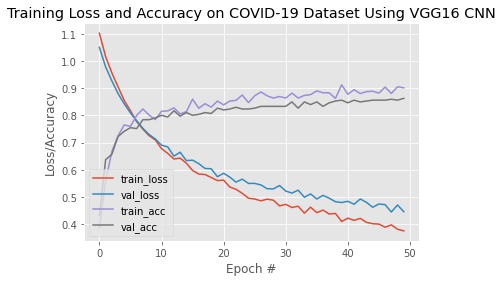

In [7]:
# plot the training loss and accuracy
import matplotlib.pyplot as plt
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset Using VGG16 CNN")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [8]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Covid_19', 'Normal', 'Pneumonia']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[35 44 23]
 [28 53 21]
 [36 41 25]]
Classification Report
              precision    recall  f1-score   support

    Covid_19       0.35      0.34      0.35       102
      Normal       0.38      0.52      0.44       102
   Pneumonia       0.36      0.25      0.29       102

    accuracy                           0.37       306
   macro avg       0.37      0.37      0.36       306
weighted avg       0.37      0.37      0.36       306

